# Hate Speech Detection Using NLP

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('HateSpeechDatasetBalanced.csv')

data.head()

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [3]:
data.shape

(726119, 2)

In [4]:
data['Label'].value_counts()

Label
1    364525
0    361594
Name: count, dtype: int64

There are 364525 hateful comments and 361594 normal or positive comments

In [6]:
data = data.sample(n=5000)

groups = data.groupby('Label')
non_hateful = groups.get_group(0)
hateful = groups.get_group(1)

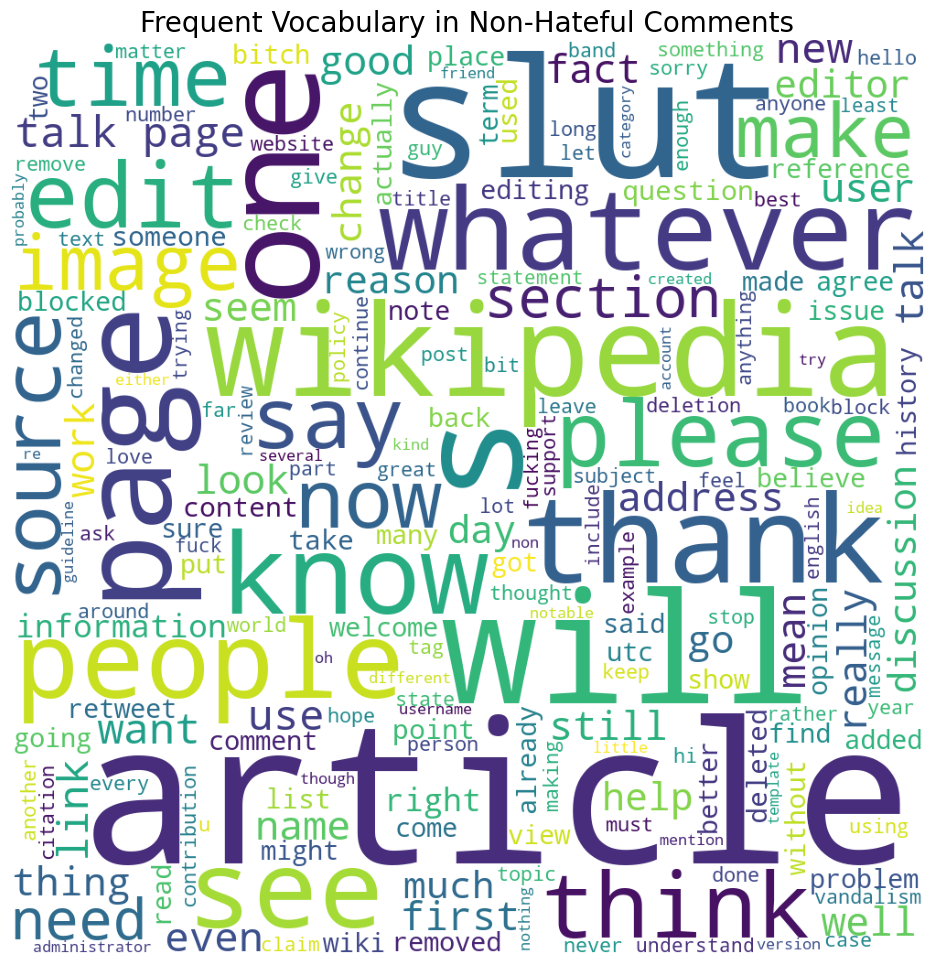

In [8]:
from wordcloud import WordCloud

combined_title = ' '.join(non_hateful['Content'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(width = 1000, height = 1000,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('Frequent Vocabulary in Non-Hateful Comments', fontsize=20)
plt.tight_layout(pad=2)

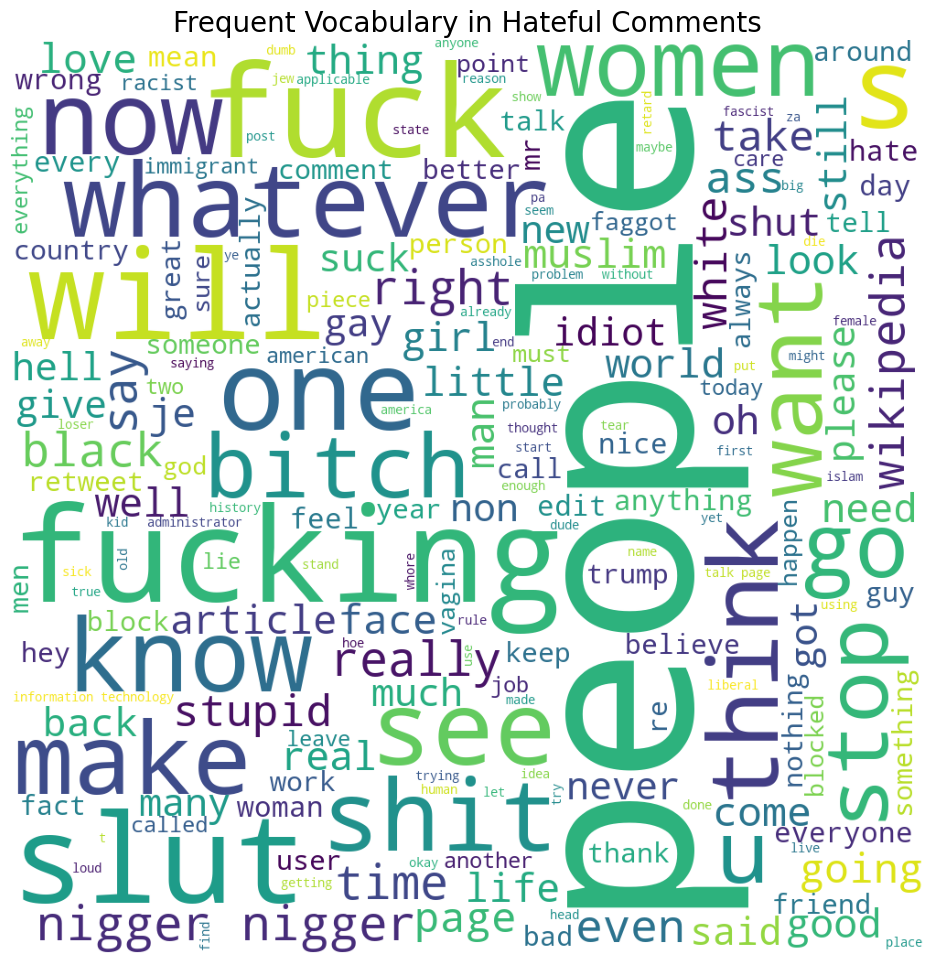

In [9]:
combined_title = ' '.join(hateful['Content'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(width = 1000, height = 1000,
                            background_color ='white',
                            min_font_size = 10).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('Frequent Vocabulary in Hateful Comments', fontsize=20)
plt.tight_layout(pad=2)

In [13]:
data.dropna(subset=['Content'],inplace=True)

X=data['Content'] 
y=data['Label'] #targets

In [14]:
messages=data.copy()
messages.reset_index(inplace=True)

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Content'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf.fit_transform(corpus).toarray()

In [23]:
y=messages['Label']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score=accuracy_score(y_test,pred)
print(score)

0.7646666666666667


Lets Try Another classifier

Random Classifier

In [29]:
y=messages['Label']

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,max_depth=3,criterion='gini',random_state=42)

rf.fit(X_train,y_train)
pred=rf.predict(X_test)
score=accuracy_score(y_test,pred)
print(score)

0.6646666666666666


This was worst than earlier 

Decision Tree Classifier

In [36]:
y=messages['Label']

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42
                          )

dt.fit(X_train,y_train)
pred=dt.predict(X_test)
scores=accuracy_score(y_test,pred)
print(scores)

0.6546666666666666


XGBCLassifier

In [37]:
y=messages['Label']

from xgboost import XGBClassifier
xgb=XGBClassifier(criterion='gini',max_depth=5)

xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)
scores=accuracy_score(y_test,pred)
print(scores)

0.73


Out of all Naive Bayes is selected as  final model